# Midterm One - MShah - 03282019

##### In this project I will attempt to create recreate wave propagations using python. I will start by animating the 2-dimensional wave equation then I will move on to putting objects into the plane and having waves bounce around them. The first part is shown below

In [1]:
#Import the proper packets needed.
import numpy as np
from numpy import pi,sin,cos,sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

Parameters are shown below. Each parameter can be changed here to obtain different wave oscillations.

In [2]:
#Parameters

#Wave Parameters
speed = 15     #Wave Speed
fx = 2         #Wave Frequency in X
fy = 2         #Wave Frequency in Y

#Time Parameters
ts = 0.001     #Time Step
ti = 0         #Initial Time Preallocated

Here we have the equations used to create the wave function.

In [3]:
#Equations

#Nested function - Omega Frequency
freq = sqrt(fx**2+fy**2) * speed * pi                                     #Omega Frequency Value

#Wave function (defined to be called later)
def wave(x,y,t):                                                          #Defining the wave function
    return sin(pi*fx*x) * sin(fy*pi*y) * (cos(freq*t) + sin(freq*t))      #Defined function for the wave

Here we construct the vector space and the grid that the waves will be moving in.

In [4]:
#Construction of vectors and meshgrid
x = np.linspace(0,1)     #x vector created
y = np.linspace(0,1)     #y vector created

#Meshgrid construction 
X,Y = np.meshgrid(x,y)   #Grid created with size x by y.

Here we have the for loop used to create data that will be used during the animations.

In [37]:
d = []               #Empty data vector pre-allocated
for r in range(500):    #For loop used to set range for animation
    c = wave(X,Y,ti)    #Wave equation defined as single variable
    ti = ti + ts        #ti is allowed to change value for each time step to compute the next point
    d.append(c)         #Append adds a value to the end of the list in the c variable (developing c as a function of time)

3D figures are called using matplotlib and sizes are adjusted. color bars are made and the animation is created and run. These must all be in the same cell so that they can function properly.

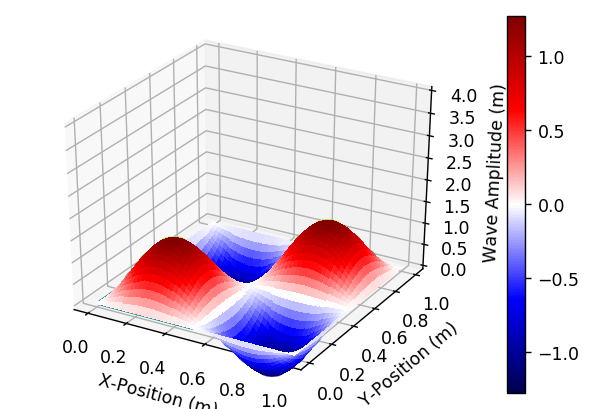

In [44]:
#Figure plotted using fig variable so it can be animated later
fig = plt.figure()

#Type of figure is set
plot = fig.gca(projection='3d')

#Size of the figure is set
fig.set_dpi(125)

#Color bar and animation is created.
color = plt.cm.ScalarMappable(cmap=plt.cm.seismic)
color.set_array(d[0])
cbar = plt.colorbar(color)

p = 0 #Preallocation of p variable for animation

#Definition of timeevolution animation is created with dependency on r.
#Plotting of the meshgrid surface is done. rstride and cstride creates an equal color distribution. Color is added
#linewidth and antialiasing affect the display of the figure.
def timeevolution(r):
    global p       #Calls p from outside the user defined function
    Z = d[p]    #Z parameter is set equal to the value the data at location p in the array.
    p += 1         #The position of the data value is changed
    plot.clear()     #Previous plots are cleared.
    plot.plot_surface(X,Y,Z,label='Wave Function', rstride=1, cstride=1,cmap=plt.cm.seismic,linewidth=0,antialiased=False)
    plot.contour(X,Y,Z)   #Contour lines are added
    plot.set_zlim(0,4)    #Size of the z axis is created
    plot.set_xlabel('X-Position (m)')
    plot.set_ylabel('Y-Position (m)')
    plot.set_zlabel('Wave Amplitude (m)')

#Plotting of the meshgrid surface is done. rstride and cstride creates an equal color distribution. Color is added
#linewidth and antialiasing affect the display of the figure.
#Animations are created based on the figure and the defined animation function.
anim = animation.FuncAnimation(fig,timeevolution)
plt.show()


Here we have the plot of the wave function. I found that this animation only works in the Enthought Canopy python code editor. For some reason it didn't work in spyder3. I would have liked to continue forward and produce the sonar/wave propagation animations but that will require some more time. This was very time consuming but it was a lot of fun to create this animation. I've done something similar in the past in matlab but never in python so it was nice to see that translation.